In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 10

In [2]:
from keras import backend as K
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 場合分け
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [10]:
history = model.fit(x_train, y_train,  # 画像とラベルデータ
                    batch_size=batch_size,
                    epochs=epochs,     # エポック数の指定
                    verbose=1,         # ログ出力の指定. 0だとログが出ない
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3283 - acc: 0.9017 - val_loss: 0.0920 - val_acc: 0.9715
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1263 - acc: 0.9632 - val_loss: 0.0608 - val_acc: 0.9797
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0948 - acc: 0.9720 - val_loss: 0.0473 - val_acc: 0.9845
Epoch 4/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0797 - acc: 0.9761 - val_loss: 0.0451 - val_acc: 0.9845
Epoch 5/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0746 - acc: 0.9775 - val_loss: 0.0417 - val_acc: 0.9865
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0686 - acc: 0.9801 - val_loss: 0.0506 - val_acc: 0.9834
Epoch 7/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.0654 - acc: 0.9808 - val_loss: 0.0429 - val_acc

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04254013696911279
Test accuracy: 0.9867


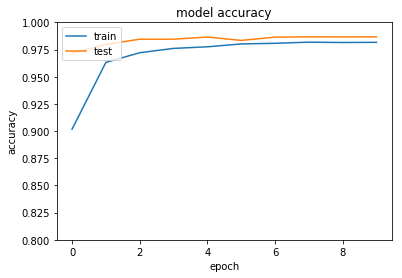

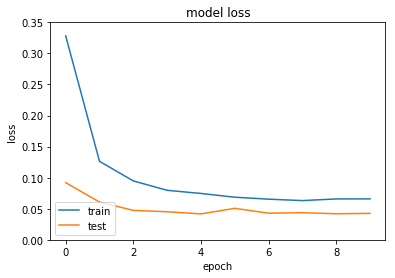

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.8,1.0])
#plt.savefig('accuracy.png')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.ylim([0.0,0.35])
#plt.savefig('loss.png')
plt.show()